<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%203/Modulo_3_Ejercicio_4_Arbol_Decision_Control_Calidad_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 4: Construcción de un Árbol de Decisión para Control de Calidad**
#### Aplicación de Árboles de Decisión para la detección de defectos en productos farmacéuticos

### **Introducción**
En este ejercicio, construiremos un modelo de Árbol de Decisión para clasificar tipos de defectos en productos farmacéuticos. El objetivo es analizar cómo diferentes características del proceso de fabricación afectan la calidad del producto y qué variables tienen mayor influencia en la clasificación.

In [1]:
# Celda 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuración de gráficos
sns.set(style='whitegrid')

### **Descripción del dataset**
Se utilizará el dataset "Control de calidad en productos farmacéuticos", que contiene información sobre la composición y el proceso de fabricación de medicamentos, así como el tipo de defecto detectado en cada lote.

In [2]:
# Celda 2
dataset_path = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_farmaceutico.csv'
data = pd.read_csv(dataset_path)

# Mostrar las primeras filas del dataset
data.head()

,ID_lote,pH_disolución,Viscosidad,Temperatura_proceso,Tiempo_mezcla,Proveedor_excipientes,Tipo_envase,Condiciones_almacenamiento,Fecha_producción,Tipo_defecto
0,1,7.248357,1.236467,86.849390,60.324385,Proveedor_8,Envase_6,Ambiente,2019-12-04,Rotura
1,2,6.930868,1.685664,79.458674,52.219221,Proveedor_4,Envase_2,Temperatura controlada,2022-09-22,Sin defecto
2,3,7.323844,1.161342,74.584565,47.979095,Proveedor_5,Envase_2,Ambiente,2020-01-03,Rotura
3,4,7.761515,1.847235,86.959804,66.975391,Proveedor_1,Envase_6,Ambiente,2023-09-12,Rotura
4,5,6.882923,1.275656,79.434116,63.796312,Proveedor_5,Envase_6,Ambiente,2023-02-06,Sin defecto


In [3]:
# Celda 3
# Información general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_lote                     75000 non-null  int64  
 1   pH_disolución               75000 non-null  float64
 2   Viscosidad                  75000 non-null  float64
 3   Temperatura_proceso         75000 non-null  float64
 4   Tiempo_mezcla               75000 non-null  float64
 5   Proveedor_excipientes       75000 non-null  object 
 6   Tipo_envase                 75000 non-null  object 
 7   Condiciones_almacenamiento  75000 non-null  object 
 8   Fecha_producción            75000 non-null  object 
 9   Tipo_defecto                75000 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 5.7+ MB


In [4]:
# Celda 4
# Resumen estadístico
data.describe()

,ID_lote,pH_disolución,Viscosidad,Temperatura_proceso,Tiempo_mezcla
count,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,37500.500000,7.000582,1.500752,79.991832,59.985505
std,21650.779432,0.500212,0.300151,4.990316,10.006090
min,1.000000,4.767198,0.161109,58.129786,15.861140
25%,18750.750000,6.661814,1.299009,76.632453,53.243873
50%,37500.500000,7.001896,1.500469,80.003497,59.943800
75%,56250.250000,7.339028,1.702967,83.351121,66.736698
max,75000.000000,9.239542,2.868634,99.884341,102.193663


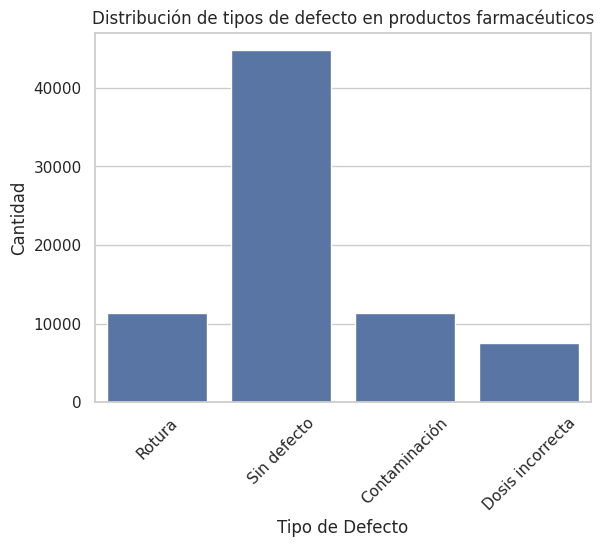

In [5]:
# Celda 5
# Distribución de la variable objetivo 'Tipo_defecto'
sns.countplot(x='Tipo_defecto', data=data)
plt.title('Distribución de tipos de defecto en productos farmacéuticos')
plt.xlabel('Tipo de Defecto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### **Preprocesamiento de los datos**
Se convierten las variables categóricas en dummies y se normalizan las variables numéricas.

In [6]:
# Celda 6
# Convertir variables categóricas en variables dummies
data = pd.get_dummies(data, columns=['Proveedor_excipientes', 'Tipo_envase', 'Condiciones_almacenamiento'], drop_first=True)

# Convertir la variable objetivo en formato numérico
tipo_defecto_mapping = {'Sin defecto': 0, 'Rotura': 1, 'Contaminación': 2, 'Dosis incorrecta': 3}
data['Tipo_defecto'] = data['Tipo_defecto'].map(tipo_defecto_mapping)

# Verificar la estructura del dataset después de las transformaciones
data.head()

,ID_lote,pH_disolución,Viscosidad,Temperatura_proceso,Tiempo_mezcla,Fecha_producción,Tipo_defecto,Proveedor_excipientes_Proveedor_2,Proveedor_excipientes_Proveedor_3,Proveedor_excipientes_Proveedor_4,...,Proveedor_excipientes_Proveedor_6,Proveedor_excipientes_Proveedor_7,Proveedor_excipientes_Proveedor_8,Tipo_envase_Envase_2,Tipo_envase_Envase_3,Tipo_envase_Envase_4,Tipo_envase_Envase_5,Tipo_envase_Envase_6,Condiciones_almacenamiento_Refrigerado,Condiciones_almacenamiento_Temperatura controlada
0,1,7.248357,1.236467,86.849390,60.324385,2019-12-04,1,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,2,6.930868,1.685664,79.458674,52.219221,2022-09-22,0,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,3,7.323844,1.161342,74.584565,47.979095,2020-01-03,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,4,7.761515,1.847235,86.959804,66.975391,2023-09-12,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,5,6.882923,1.275656,79.434116,63.796312,2023-02-06,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### **División del dataset en entrenamiento y prueba**

In [7]:
# Convertir la columna de fecha en una variable numérica

# Convertir la columna de fecha a tipo datetime
data['Fecha_producción'] = pd.to_datetime(data['Fecha_producción'])

# Crear una nueva variable con los días desde la producción hasta la fecha actual
data['Dias_desde_produccion'] = (pd.to_datetime('today') - data['Fecha_producción']).dt.days

# Eliminar la columna original de fecha
data.drop(columns=['Fecha_producción'], inplace=True)

# Verificar el cambio
data.head()


,ID_lote,pH_disolución,Viscosidad,Temperatura_proceso,Tiempo_mezcla,Tipo_defecto,Proveedor_excipientes_Proveedor_2,Proveedor_excipientes_Proveedor_3,Proveedor_excipientes_Proveedor_4,Proveedor_excipientes_Proveedor_5,...,Proveedor_excipientes_Proveedor_7,Proveedor_excipientes_Proveedor_8,Tipo_envase_Envase_2,Tipo_envase_Envase_3,Tipo_envase_Envase_4,Tipo_envase_Envase_5,Tipo_envase_Envase_6,Condiciones_almacenamiento_Refrigerado,Condiciones_almacenamiento_Temperatura controlada,Dias_desde_produccion
0,1,7.248357,1.236467,86.849390,60.324385,1,False,False,False,False,...,False,True,False,False,False,False,True,False,False,1975
1,2,6.930868,1.685664,79.458674,52.219221,0,False,False,True,False,...,False,False,True,False,False,False,False,False,True,952
2,3,7.323844,1.161342,74.584565,47.979095,1,False,False,False,True,...,False,False,True,False,False,False,False,False,False,1945
3,4,7.761515,1.847235,86.959804,66.975391,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,597
4,5,6.882923,1.275656,79.434116,63.796312,0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,815


In [8]:
# Celda 7
# Definir variables predictoras y objetivo
X = data.drop(columns=['Tipo_defecto'])
y = data['Tipo_defecto']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Entrenamiento del modelo de Árbol de Decisión**

In [9]:
# Celda 8
# Crear y entrenar el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight="balanced")
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

### **Evaluación del modelo**

In [10]:
# Celda 9
y_pred = modelo_arbol.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.12
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.60      0.01      0.01      8952
           1       0.16      0.14      0.15      2264
           2       0.16      0.10      0.12      2268
           3       0.10      0.76      0.18      1516

    accuracy                           0.12     15000
   macro avg       0.25      0.25      0.11     15000
weighted avg       0.41      0.12      0.07     15000



### **Visualización de la matriz de confusión**

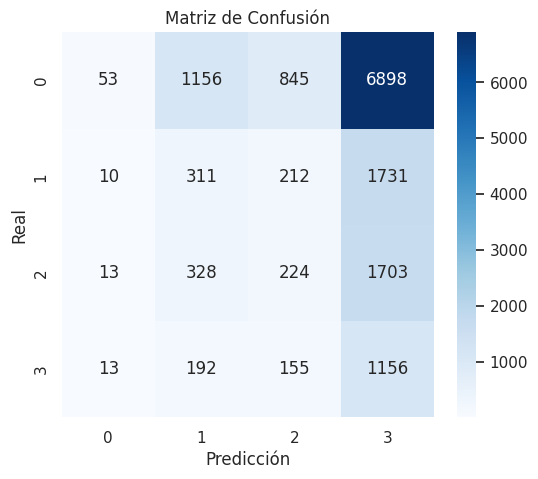

In [11]:
# Celda 10
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

### **Visualización del Árbol de Decisión**

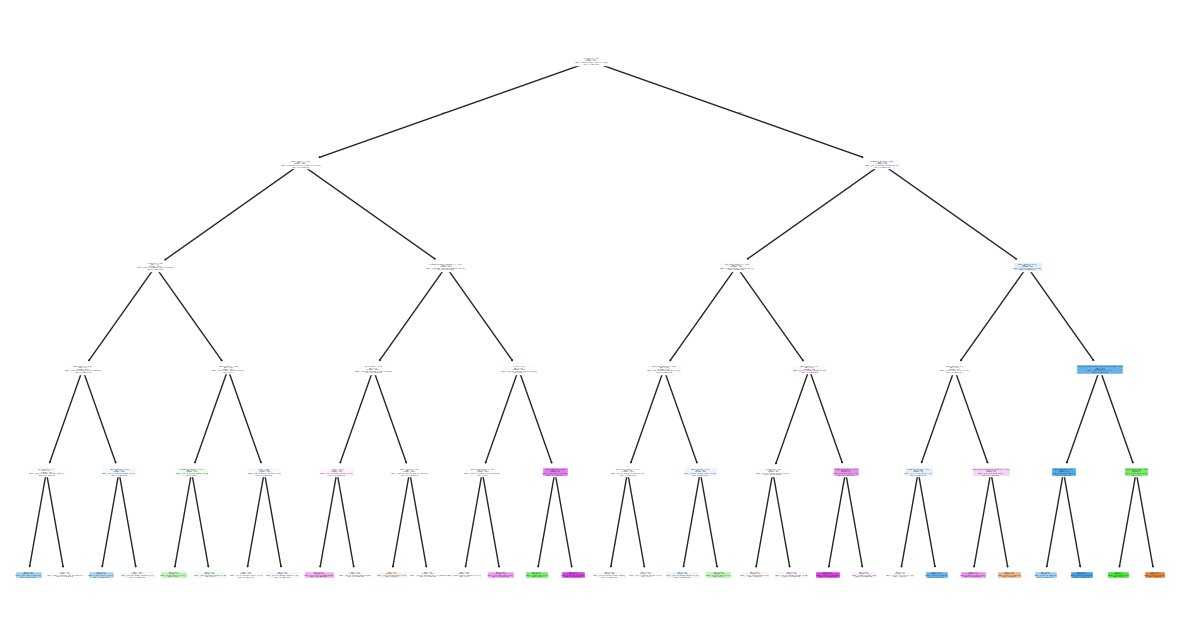

In [12]:
# Celda 11
plt.figure(figsize=(15,8))
plot_tree(modelo_arbol, feature_names=X.columns, class_names=['Sin defecto', 'Rotura', 'Contaminación', 'Dosis incorrecta'], filled=True)
plt.show()

## Conclusiones

En este ejercicio, hemos aplicado el algoritmo DecisionTreeClassifier para clasificar el tipo de defecto que podemos encontrar en las piezas.

Como nuestra variable objetivo está desbalanceada, hemos usado stratify para asegurarnos que en el split train/test hay representacion de todos los posibles valores de "Defecto". Además hemos notificado la modelo que las clases deben balancearse.

Este modelo por si mismo tiene un rendimiento bajo, pero servirá como basee para modelos más avanzados como RandomForest, y podremos unirlo a técnicas como GridSearch, Cross Validation para mejorar más aún sus predicciones.

